In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pandasgui import show

# Preliminaries

## Inequality dataset

In [46]:
# Read inequality data
df_ineq = pd.read_excel('C:/Users/Jesson Pagaduan/Google Drive/regional_inequality/results/spatial_inequality/sigma_convergence.xlsx')

## GRDP dataset

In [57]:
# Read GRDP data
df_grdp = pd.read_excel('C:/Users/Jesson Pagaduan/Google Drive/regional_inequality/data/scratch/grdp.xlsx')

# Create columns for relevant variables
df_grdp = df_grdp.assign(log_gdppc = lambda x: np.log(x.gdppc),
                         gdp_ind_share = lambda x: x.gdp_ind / x.gdp,
                         gdp_svc_share = lambda x: x.gdp_svc / x.gdp,
                         gdp_nonagr_share = lambda x: x.gdp_ind_share + x.gdp_svc_share)

# Keep relevant columns only
df_grdp = df_grdp[['year', 'region', 'zone_code', 'gdppc', 'log_gdppc', 'gdp_ind_share', 'gdp_svc_share', 'gdp_nonagr_share']]

In [58]:
df_grdp

,year,region,zone_code,gdppc,log_gdppc,gdp_ind_share,gdp_svc_share,gdp_nonagr_share
0,2000,Autonomous Region in Muslim Mindanao (ARMM),1,14732.7,9.597825,0.052710,0.275560,0.328269
1,2001,Autonomous Region in Muslim Mindanao (ARMM),1,11293.1,9.331947,0.049720,0.316664,0.366384
2,2002,Autonomous Region in Muslim Mindanao (ARMM),1,12698.5,9.449239,0.045815,0.302729,0.348544
3,2003,Autonomous Region in Muslim Mindanao (ARMM),1,12772.2,9.455026,0.045524,0.313460,0.358984
4,2004,Autonomous Region in Muslim Mindanao (ARMM),1,13133.3,9.482906,0.044485,0.309412,0.353897
...,...,...,...,...,...,...,...,...
318,2014,Region XIII (Caraga),17,35672.0,10.482121,0.352629,0.452056,0.804685
319,2015,Region XIII (Caraga),17,35553.0,10.478780,0.372794,0.456444,0.829238
320,2016,Region XIII (Caraga),17,35678.7,10.482309,0.354249,0.481588,0.835837
321,2017,Region XIII (Caraga),17,36235.3,10.497789,0.339969,0.498990,0.838959


In [59]:
# Rank regions according to GDP per capita
df_grdp.groupby('region').mean().sort_values('gdppc', ascending=False)[['gdppc']]

,gdppc
region,
Metropolitan Manila,172272.831579
Region IV-A (Calabarzon),83890.142857
Cordillera Administrative Region (CAR),71839.784211
Region III (Central Luzon),53112.078947
Region VII (Central Visayas),50969.115789
Region XI (Davao Region),50256.273684
Region X (Northern Mindanao),48844.805263
Region I (Ilocos Region),39211.026316
Region IV-B (Mimaropa),38705.085714


In [60]:
# Rank regions according to log(GDP per capita)
df_grdp.groupby('region').mean().sort_values('gdppc', ascending=False)[['log_gdppc']]

,log_gdppc
region,
Metropolitan Manila,12.028164
Region IV-A (Calabarzon),11.330602
Cordillera Administrative Region (CAR),11.179233
Region III (Central Luzon),10.861729
Region VII (Central Visayas),10.809654
Region XI (Davao Region),10.800722
Region X (Northern Mindanao),10.771539
Region I (Ilocos Region),10.562012
Region IV-B (Mimaropa),10.562364


## Urban population dataset

In [62]:
# Read urban population data
df_urban = pd.read_excel('C:/Users/Jesson Pagaduan/Google Drive/regional_inequality/data/raw/population/psa_population/urban_population_series.xlsx')

In [70]:
# Rank regions according to urban population share
df_urban.groupby('region').mean().sort_values('urban_pop_share_ipo', ascending=False)[['region_id', 'urban_pop_share_ipo']]

,region_id,urban_pop_share_ipo
region,,
Metropolitan Manila,3,100.000000
Region XI (Davao Region),15,58.431409
Region IV-A (Calabarzon),7,58.358429
Region III (Central Luzon),6,49.610040
Region XII (SOCCSKSARGEN),16,45.485371
Region VII (Central Visayas),12,42.511808
Region X (Northern Mindanao),14,39.820640
Region VI (Western Visayas),11,34.053220
Region IX (Zamboanga Peninsula),9,33.171808


# Exploratory data analysis

In [81]:
# Join the three data frames
df_invertedU = df_ineq.set_index(['region', 'year']).join(df_grdp.set_index(['region', 'year']), rsuffix='_r')
df_invertedU = df_invertedU.join(df_urban.set_index(['region', 'year']), rsuffix='_r')

# Keep relevant columns only
df_invertedU.drop(columns=['zone_code', 'region_id_r'], inplace=True)
df_invertedU.reset_index(inplace=True)

# Export to Excel
df_invertedU.to_excel('invertedU.xlsx', index=False)

In [86]:
df_invertedU

,region,year,region_id,GE(-1),GE(0),GE(1),GE(2),Gini,gdppc,log_gdppc,gdp_ind_share,gdp_svc_share,gdp_nonagr_share,urban_pop_share_ipo
0,Autonomous Region in Muslim Mindanao (ARMM),2000,1,6.174013,1.311187,0.744793,1.187689,0.587590,14732.7,9.597825,0.052710,0.275560,0.328269,0.000000
1,Autonomous Region in Muslim Mindanao (ARMM),2001,1,7.731360,1.268997,0.684004,1.133836,0.571573,11293.1,9.331947,0.049720,0.316664,0.366384,0.000000
2,Autonomous Region in Muslim Mindanao (ARMM),2002,1,7.398815,1.279763,0.714918,1.167200,0.579837,12698.5,9.449239,0.045815,0.302729,0.348544,0.000000
3,Autonomous Region in Muslim Mindanao (ARMM),2003,1,5.147245,1.207445,0.717005,1.172306,0.581456,12772.2,9.455026,0.045524,0.313460,0.358984,0.351055
4,Autonomous Region in Muslim Mindanao (ARMM),2004,1,3.167603,0.822700,0.533813,1.016950,0.520429,13133.3,9.482906,0.044485,0.309412,0.353897,2.258726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Region XIII (Caraga),2014,17,0.661356,0.226261,0.154504,0.528524,0.294648,35672.0,10.482121,0.352629,0.452056,0.804685,32.268579
319,Region XIII (Caraga),2015,17,0.305284,0.211516,0.178139,0.583399,0.320817,35553.0,10.478780,0.372794,0.456444,0.829238,33.472946
320,Region XIII (Caraga),2016,17,0.375979,0.231001,0.186305,0.589384,0.310902,35678.7,10.482309,0.354249,0.481588,0.835837,34.677313
321,Region XIII (Caraga),2017,17,0.232597,0.179113,0.154671,0.540149,0.291069,36235.3,10.497789,0.339969,0.498990,0.838959,35.881680


## Regional inequality and economic development

<AxesSubplot:xlabel='log_gdppc', ylabel='Gini'>

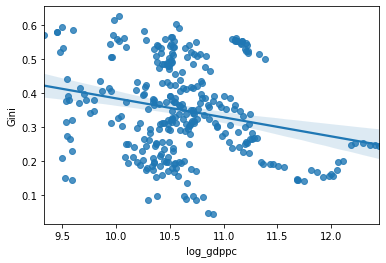

In [85]:
sns.regplot(x='log_gdppc', y='Gini', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='Gini'>

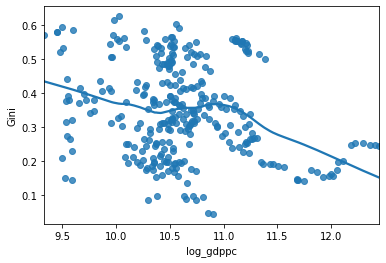

In [87]:
sns.regplot(x='log_gdppc', y='Gini', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(-1)'>

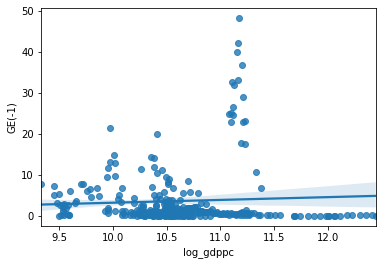

In [88]:
sns.regplot(x='log_gdppc', y='GE(-1)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(-1)'>

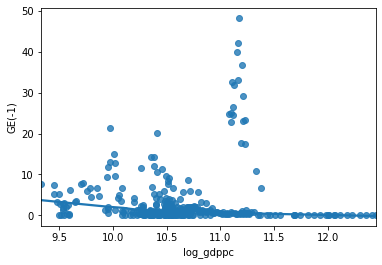

In [89]:
sns.regplot(x='log_gdppc', y='GE(-1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(0)'>

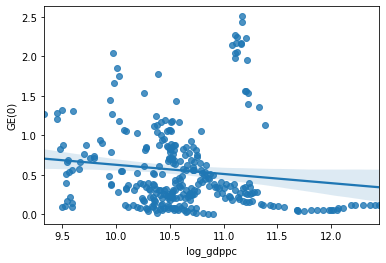

In [90]:
sns.regplot(x='log_gdppc', y='GE(0)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(0)'>

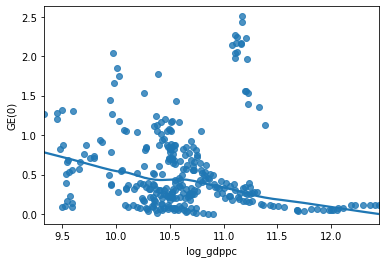

In [91]:
sns.regplot(x='log_gdppc', y='GE(0)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(1)'>

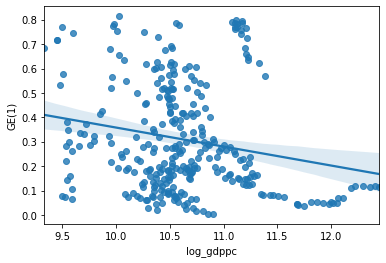

In [92]:
sns.regplot(x='log_gdppc', y='GE(1)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(1)'>

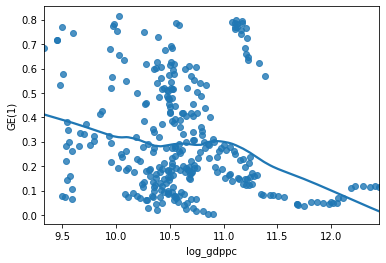

In [93]:
sns.regplot(x='log_gdppc', y='GE(1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(2)'>

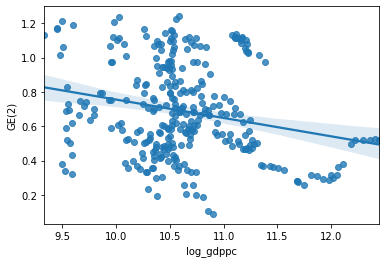

In [94]:
sns.regplot(x='log_gdppc', y='GE(2)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(2)'>

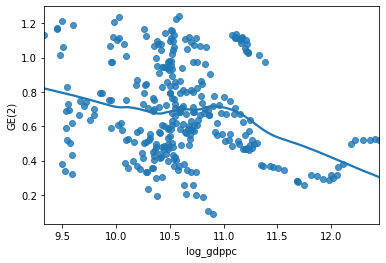

In [95]:
sns.regplot(x='log_gdppc', y='GE(2)', data=df_invertedU, lowess=True)

## Regional inequality and structural transformation

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='Gini'>

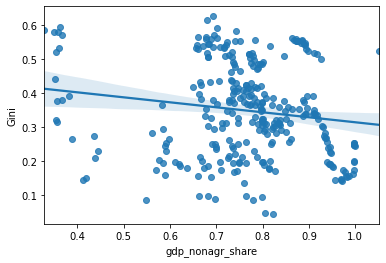

In [96]:
sns.regplot(x='gdp_nonagr_share', y='Gini', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='Gini'>

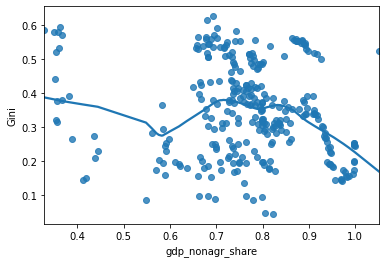

In [97]:
sns.regplot(x='gdp_nonagr_share', y='Gini', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(-1)'>

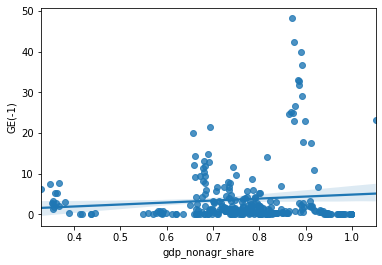

In [98]:
sns.regplot(x='gdp_nonagr_share', y='GE(-1)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(-1)'>

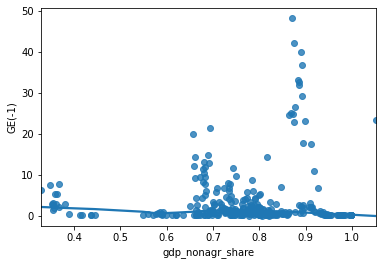

In [100]:
sns.regplot(x='gdp_nonagr_share', y='GE(-1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(0)'>

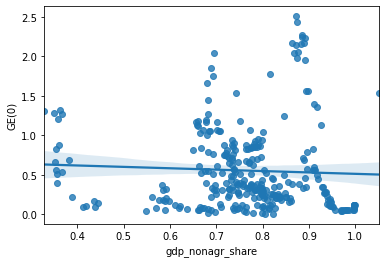

In [101]:
sns.regplot(x='gdp_nonagr_share', y='GE(0)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(0)'>

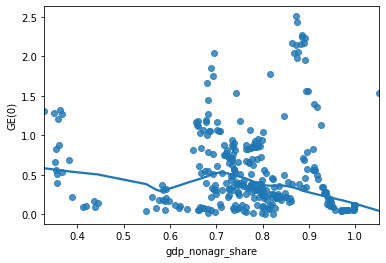

In [102]:
sns.regplot(x='gdp_nonagr_share', y='GE(0)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(1)'>

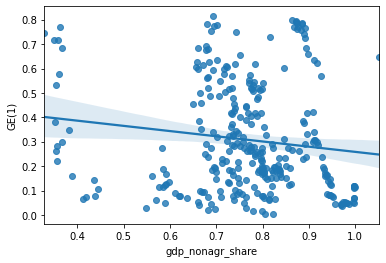

In [103]:
sns.regplot(x='gdp_nonagr_share', y='GE(1)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(1)'>

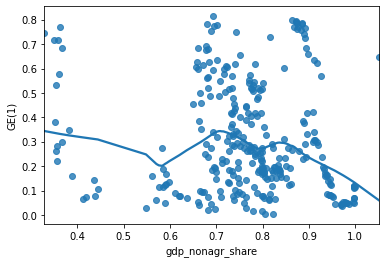

In [104]:
sns.regplot(x='gdp_nonagr_share', y='GE(1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(2)'>

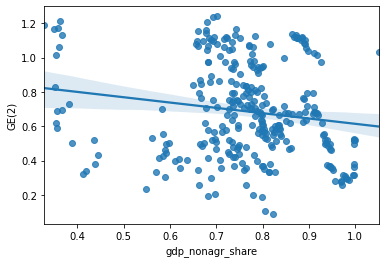

In [105]:
sns.regplot(x='gdp_nonagr_share', y='GE(2)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(2)'>

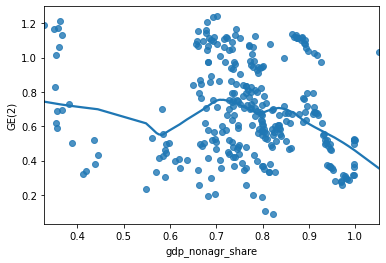

In [106]:
sns.regplot(x='gdp_nonagr_share', y='GE(2)', data=df_invertedU, lowess=True)

## Regional inequality and urbanization

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='Gini'>

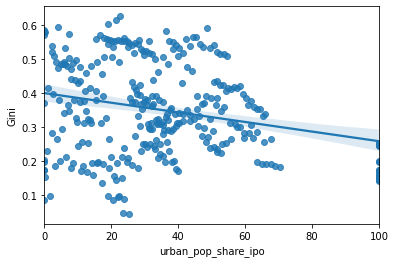

In [107]:
sns.regplot(x='urban_pop_share_ipo', y='Gini', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(-1)'>

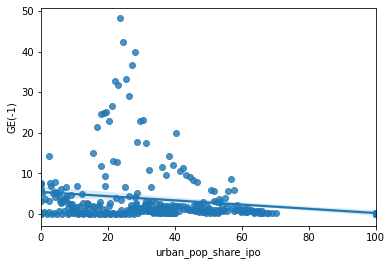

In [108]:
sns.regplot(x='urban_pop_share_ipo', y='GE(-1)', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(0)'>

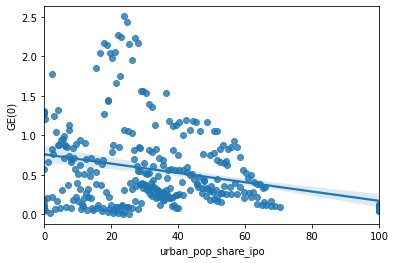

In [109]:
sns.regplot(x='urban_pop_share_ipo', y='GE(0)', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(1)'>

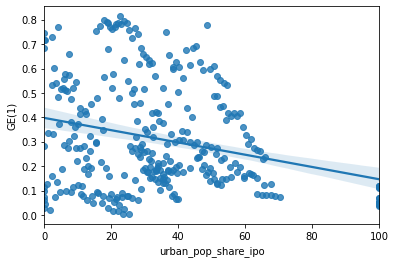

In [110]:
sns.regplot(x='urban_pop_share_ipo', y='GE(1)', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(2)'>

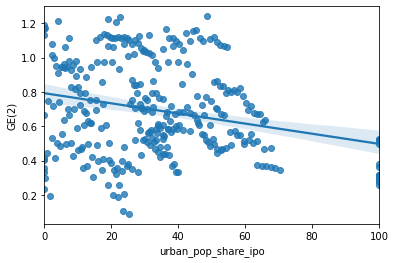

In [111]:
sns.regplot(x='urban_pop_share_ipo', y='GE(2)', data=df_invertedU)

# Robustness check: Exclude Metro Manila

In [115]:
df_invertedU = df_invertedU.loc[df_invertedU['region_id'] != 3]

## Regional inequality and economic development

<AxesSubplot:xlabel='log_gdppc', ylabel='Gini'>

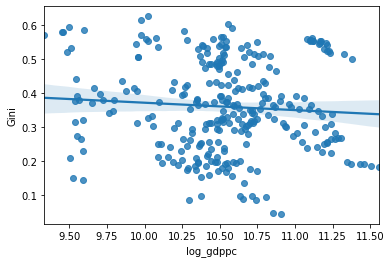

In [116]:
sns.regplot(x='log_gdppc', y='Gini', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='Gini'>

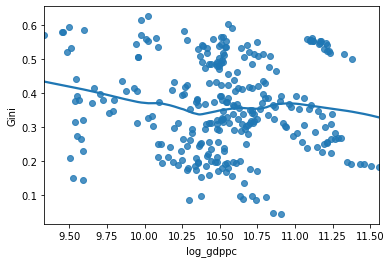

In [117]:
sns.regplot(x='log_gdppc', y='Gini', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(-1)'>

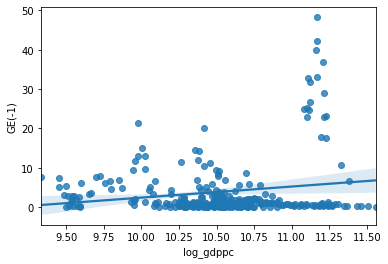

In [118]:
sns.regplot(x='log_gdppc', y='GE(-1)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(-1)'>

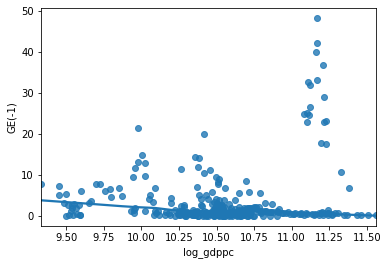

In [119]:
sns.regplot(x='log_gdppc', y='GE(-1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(0)'>

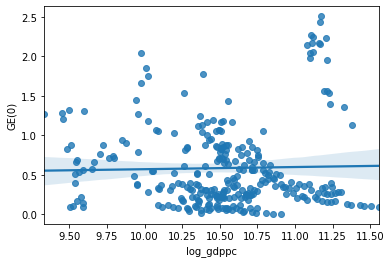

In [120]:
sns.regplot(x='log_gdppc', y='GE(0)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(0)'>

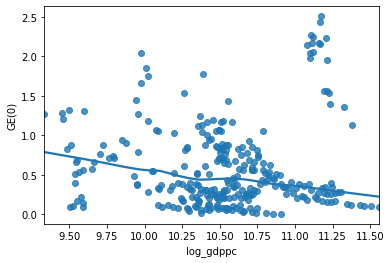

In [121]:
sns.regplot(x='log_gdppc', y='GE(0)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(1)'>

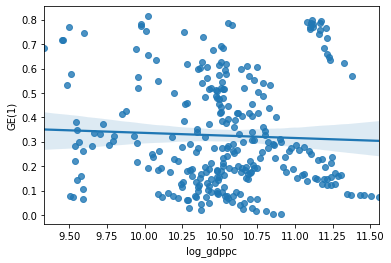

In [122]:
sns.regplot(x='log_gdppc', y='GE(1)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(1)'>

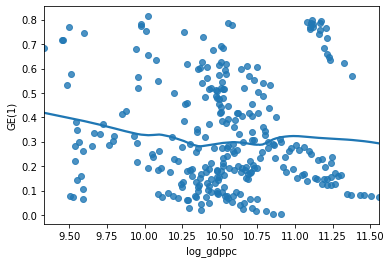

In [123]:
sns.regplot(x='log_gdppc', y='GE(1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(2)'>

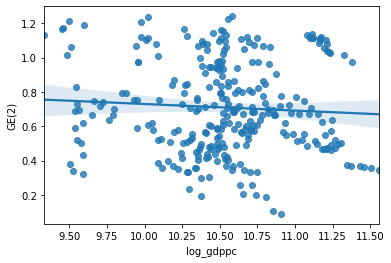

In [124]:
sns.regplot(x='log_gdppc', y='GE(2)', data=df_invertedU)

<AxesSubplot:xlabel='log_gdppc', ylabel='GE(2)'>

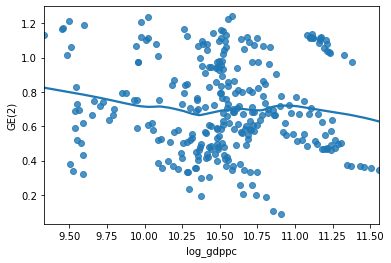

In [125]:
sns.regplot(x='log_gdppc', y='GE(2)', data=df_invertedU, lowess=True)

## Regional inequality and structural transformation

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='Gini'>

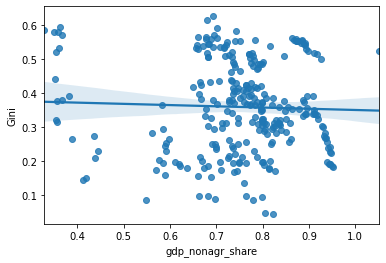

In [126]:
sns.regplot(x='gdp_nonagr_share', y='Gini', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='Gini'>

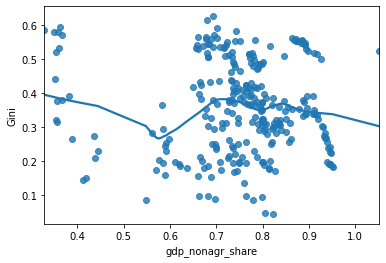

In [127]:
sns.regplot(x='gdp_nonagr_share', y='Gini', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(-1)'>

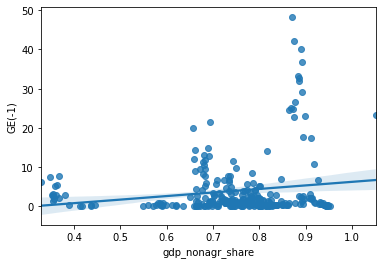

In [128]:
sns.regplot(x='gdp_nonagr_share', y='GE(-1)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(-1)'>

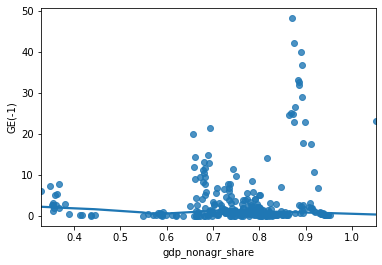

In [129]:
sns.regplot(x='gdp_nonagr_share', y='GE(-1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(0)'>

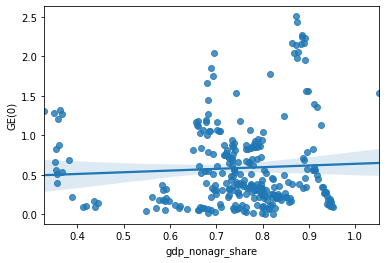

In [130]:
sns.regplot(x='gdp_nonagr_share', y='GE(0)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(0)'>

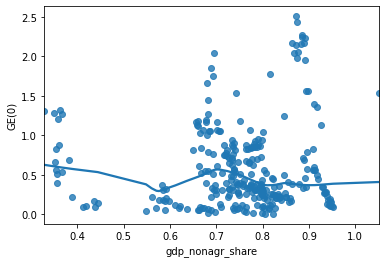

In [131]:
sns.regplot(x='gdp_nonagr_share', y='GE(0)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(1)'>

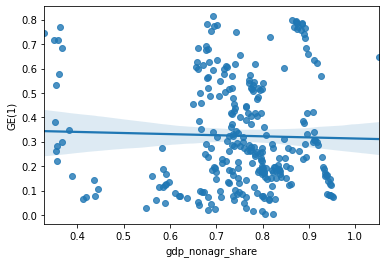

In [132]:
sns.regplot(x='gdp_nonagr_share', y='GE(1)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(1)'>

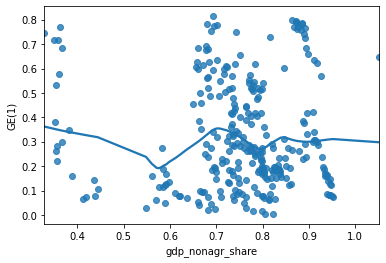

In [133]:
sns.regplot(x='gdp_nonagr_share', y='GE(1)', data=df_invertedU, lowess=True)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(2)'>

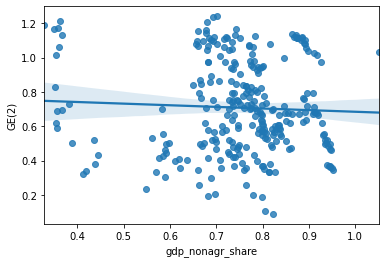

In [134]:
sns.regplot(x='gdp_nonagr_share', y='GE(2)', data=df_invertedU)

<AxesSubplot:xlabel='gdp_nonagr_share', ylabel='GE(2)'>

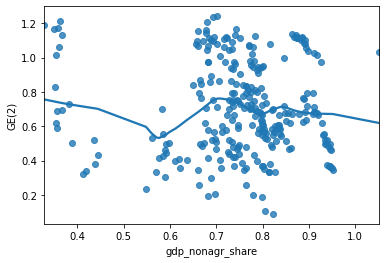

In [135]:
sns.regplot(x='gdp_nonagr_share', y='GE(2)', data=df_invertedU, lowess=True)

## Regional inequality and urbanization

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='Gini'>

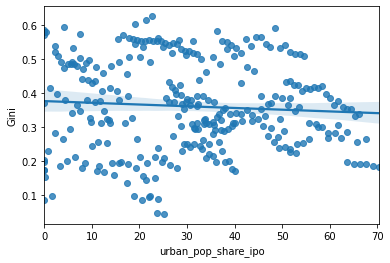

In [136]:
sns.regplot(x='urban_pop_share_ipo', y='Gini', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(-1)'>

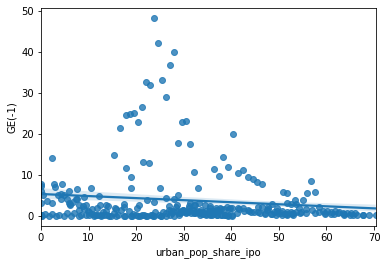

In [137]:
sns.regplot(x='urban_pop_share_ipo', y='GE(-1)', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(0)'>

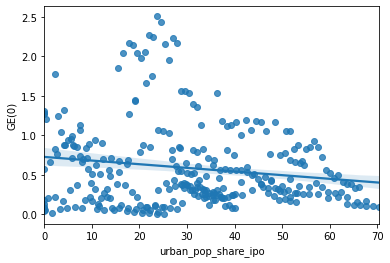

In [138]:
sns.regplot(x='urban_pop_share_ipo', y='GE(0)', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(1)'>

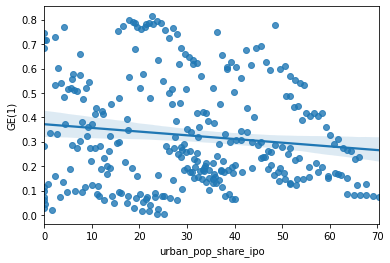

In [139]:
sns.regplot(x='urban_pop_share_ipo', y='GE(1)', data=df_invertedU)

<AxesSubplot:xlabel='urban_pop_share_ipo', ylabel='GE(2)'>

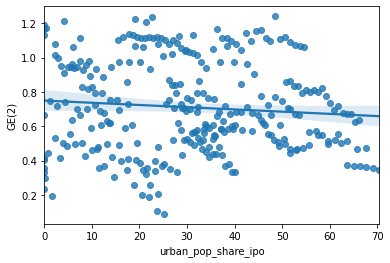

In [140]:
sns.regplot(x='urban_pop_share_ipo', y='GE(2)', data=df_invertedU)